In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [15]:
data = {
    'Collide': {
        'input': 0.633,
        'simulated': 0.713,
        'observed': 0.893,
    },
    'Contain': {
        'input': 0.593,
        'simulated': 0.607,
        'observed': 0.76,
    },
    'Dominoes': {
        'input': 0.433,
        'simulated': 0.483,
        'observed': 0.867,
    },
    'Drape': {
        'input': 0.56,
        'simulated': 0.533,
        'observed': 0.7,
    },
    'Drop': {
        'input': 0.567,
        'simulated': 0.7,
        'observed': 0.72,
    },
    'Link': {
        'input': 0.56,
        'simulated': 0.653, 
        'observed': 0.773,
    },
    'Roll': {
        'input': 0.68,
        'simulated': 0.713,
        'observed': 0.787,
    },
    'Support': {
        'input': 0.713,
        'simulated': 0.72,
        'observed': 0.867,
    },
}

df = pd.DataFrame(columns=['scenario','protocol', 'value'])
for scenario, res in data.items():
    for protocol, val in res.items():
        df = df.append({
            'scenario': scenario,
            'protocol': protocol,
            'value': val,
        }, ignore_index=True)

In [23]:
palette = None
def add_boxplot(df, x, y, category):
    sns.boxplot(x=x, y=y, data=df, hue=category, palette=palette, fliersize=0)

def add_pointplot(df, x, y,  category):
    sns.pointplot(x=x, y=y, data=df, hue=category, palette=palette, join=False, dodge=0.7, markers='s')
    
def add_stripplot(df, x, y, category, size=8):
    sns.stripplot(x=x, y=y, data=df, hue=category, size=8, palette=palette, alpha=0.5, dodge=True)

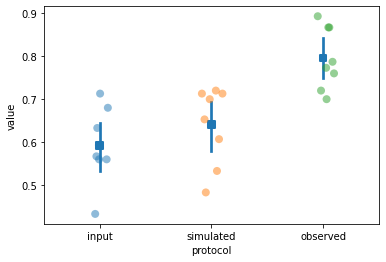

In [32]:
add_pointplot(df, 'protocol', 'value', None)
add_stripplot(df, 'protocol', 'value', None)

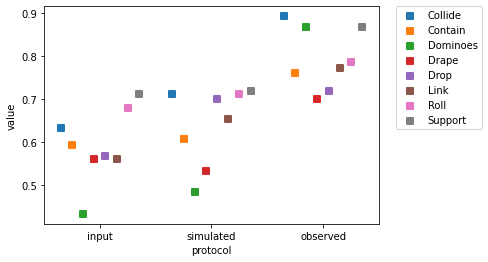

In [31]:
add_pointplot(df, 'protocol', 'value', 'scenario')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

0.64+/-0.09


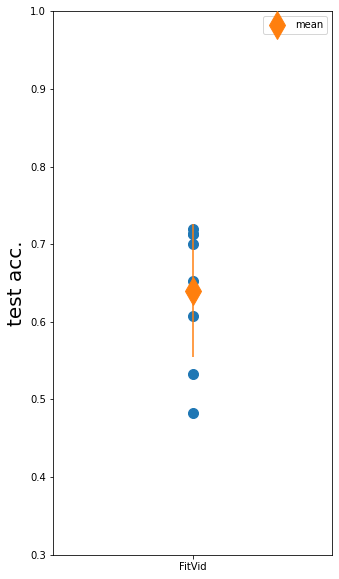

In [47]:
x = ['FitVid']
plt.figure(figsize=(5,10))
plt.scatter(x*8,data.values(), s=100)
mean_val = np.mean(list(data.values()))
std_val = np.std(list(data.values()))
print(f'{mean_val:.2f}+/-{std_val:.2f}')
plt.errorbar(x, mean_val, std_val, linestyle='None', marker='d', color='C1', label='mean', markersize=20)
plt.ylabel('test acc.', fontsize=20)
plt.ylim([0.3, 1])
plt.legend()